In [86]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
%matplotlib inline

In [26]:
data = pd.read_csv('spam.csv')

In [27]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
data['Category']=data['Category'].map({'ham':0,'spam':1})

In [29]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [30]:
data.describe()

,Category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


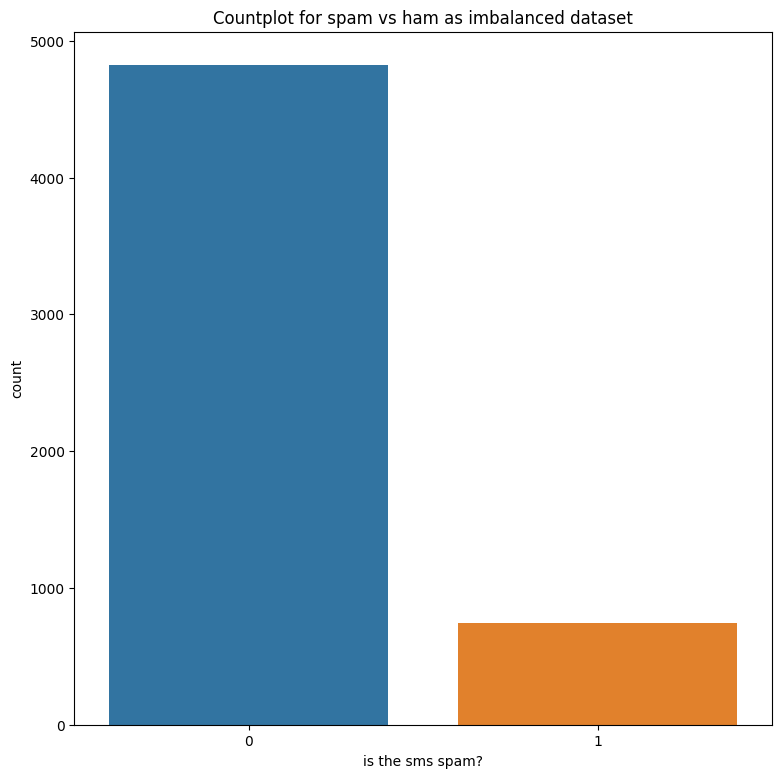

In [31]:
plt.figure(figsize=(9,9))
p=sns.countplot(x='Category',data=data)
p=plt.title('Countplot for spam vs ham as imbalanced dataset')
p=plt.xlabel('is the sms spam?')
p=plt.ylabel('count')

In [32]:
only_spam = data[data['Category']==1]
only_spam

,Category,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [33]:
data.shape

(5572, 2)

In [34]:
count = (data.shape[0]-only_spam.shape[0])/only_spam.shape[0]

In [35]:
int(count)

6

In [36]:
for i in range(0, int(count-1)):
    data = pd.concat([data, only_spam])

In [37]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


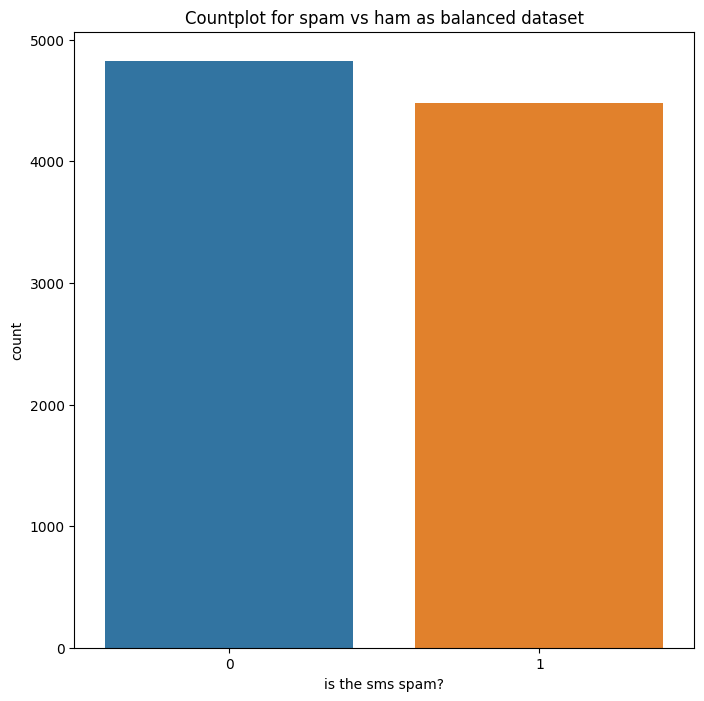

In [38]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='Category',data=data)
p=plt.title('Countplot for spam vs ham as balanced dataset')
p=plt.xlabel('is the sms spam?')
p=plt.ylabel('count')

In [41]:
data['word_count']=data['Message'].apply(lambda x:len(x.split()))

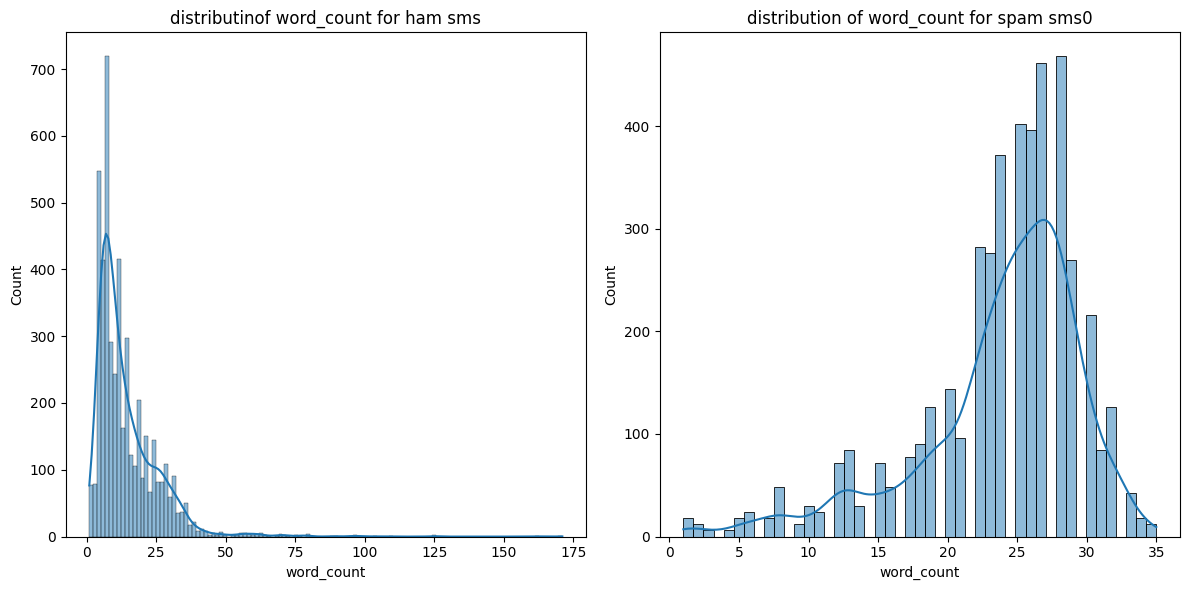

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(data[data['Category']==0].word_count,kde=True)
p=plt.title('distributinof word_count for ham sms')
plt.subplot(1,2,2)
g=sns.histplot(data[data['Category']==1].word_count, kde=True)
p=plt.title('distribution of word_count for spam sms0')
plt.tight_layout()
plt.show()

In [46]:
data.head()

,Category,Message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


In [47]:
def currency(data):
    currency_symbols = ['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [61]:
data['contains_currency']=data['Message'].apply(currency)

In [62]:
data

,Category,Message,word_count,contains_currency_symbol,contains_currency
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,0


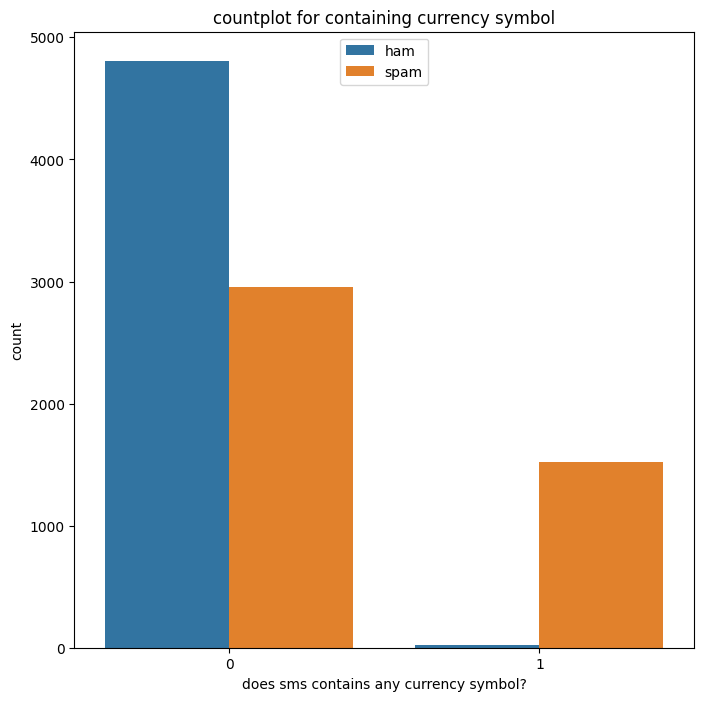

In [63]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_currency_symbol",data=data,hue='Category')
p=plt.title('countplot for containing currency symbol')
p=plt.xlabel('does sms contains any currency symbol?')
p=plt.ylabel('count')
p=plt.legend(labels=['ham','spam'],loc=9)

In [84]:
#def number(data):
 #   for i in data:
  #      if int(ord)(i) >= 48 and int(ord)(i) <= 57:
   #         return 1
    #return 0    


In [85]:
#data['contains_number']=data['Message'].apply(number)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'builtin_function_or_method'

In [40]:
#data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,0
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,0
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,28,0


In [60]:
#plt.figure(figsize=(8,8))
#p=sns.countplot(x='contains_number',data=data,hue='Category')

ValueError: Could not interpret input 'contains_number'

<Figure size 800x800 with 0 Axes>

In [87]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Apple\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Apple\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
corpus=[]
wnl= WordNetLemmatizer()
for sns in list(data.Message):
    message= re.sub(pattern='[a-zA-Z]',repl='',string=sns)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lem_words=[wnl.lemmatize(word)for word in filtered_words]
    message=''.join(lem_words)
    
    
    corpus.append(message)

In [91]:
corpus 

[',........',
 '......',
 "2212005.87121()&'0845281007518'",
 '......',
 "',",
 "'3'!'?!,£1.50",
 '..',
 "'()'.*9",
 '!!£900!09061701461.341.12.',
 '11?!08002986030',
 "'',?'.",
 '!10020,000>1187575.150/,6,16+4',
 '!1£100,000!::81010&..44031718',
 "'...",
 '!!',
 ':,>>://..?=',
 "...':)",
 '2.....',
 '\x92.\x92',
 '-/.8707787077:,4/ú1.20365044516+',
 '?',
 '‘2',
 'ü......',
 '.3.?',
 '.?',
 ".'...'.",
 '.',
 "???'??",
 "'&;',''",
 '..!?',
 "',''",
 "2..2!'!.?",
 '.',
 '?',
 '£5/.',
 '...ü...28',
 ",''",
 '',
 '......',
 "!'?'.'!",
 '...',
 '?,,............',
 '07732584351--=+.08000930705',
 '?',
 '!.&;#&;...',
 '....',
 "'.",
 ',?',
 ",'",
 "'.'.'..",
 '..',
 '&;#&;,&;#&;',
 "'",
 '..,"".\'\'\'.\'.\'.',
 '.:.??',
 '?@&;&;',
 '!12.09061209465!,3,3,4!420-4-5.150.!',
 ",'.",
 '',
 '...',
 "$1.'..",
 '..',
 '',
 ',?',
 '..',
 ',.£1500,09066364589',
 '".."?...',
 ',&41£1000.8712118+6*£1.50(.)10,13',
 '""?\'!',
 '.',
 '.........',
 '.',
 '?',
 '..:)??',
 '...',
 '..',
 '..',
 ':).',
 '&;#&;'

In [99]:
Tfidf = TfidfVectorizer(max_features=500)
vectors = Tfidf.fit_transform(corpus).toarray()
feature_names = Tfidf.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [96]:
x=pd.DataFrame(vectors ,columns=feature_names)
y=data['Category']

TypeError: 'method' object is not iterable

In [97]:
x

NameError: name 'x' is not defined

In [45]:
y

NameError: name 'y' is not defined

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined

In [47]:
mnb = MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1'cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

SyntaxError: invalid syntax (2751300289.py, line 2)

In [48]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)


NameError: name 'mnb' is not defined

In [49]:
y_pred

NameError: name 'y_pred' is not defined

In [50]:
y_test

NameError: name 'y_test' is not defined